## Aula 1 - Dados com muitas dimensões

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('exames.csv')

In [3]:
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [5]:
dados.drop(columns='exame_33', inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
SEED = 123143
np.random.seed(SEED)

x = dados.drop(columns=['id', 'diagnostico'])
y = dados['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                       test_size = 0.3)

In [8]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit(treino_x, treino_y)
print(str(round(model.score(teste_x, teste_y)*100, 2))+'%')

92.4%


In [10]:
from sklearn.dummy import DummyClassifier
SEED = 123143
np.random.seed(SEED)

model = DummyClassifier(strategy='most_frequent')
model.fit(treino_x, treino_y)
print(str(round(model.score(teste_x, teste_y)*100, 2))+'%')



66.67%


## Aula 2 - Avançando e explorando dados

In [11]:
dados

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


In [12]:
# dados_plot = pd.melt(dados.drop(columns='id'), id_vars='diagnostico', 
#                      var_name='exames', value_name='valores')

In [13]:
valores_exames = dados.drop(columns=['id', 'diagnostico'])

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
padrao = StandardScaler()
padrao.fit(valores_exames)
valores_exames_v2 = padrao.transform(valores_exames)

In [16]:
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames.keys())

In [18]:
valores_exames_v2 = pd.concat([dados['diagnostico'], valores_exames_v2], axis=1)

In [19]:
valores_exames_v2.iloc[:, 0:10]

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9
0,M,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475
1,M,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144
2,M,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231
3,M,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707
4,M,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493
...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,1.421085e-14,2.343856,1.041842,0.219060,1.947285,2.320965
565,M,1.704854,2.085134,1.615931,1.421085e-14,1.723842,0.102458,-0.017833,0.693043,1.263669
566,M,0.702284,2.045574,0.672676,1.421085e-14,0.577953,-0.840484,-0.038680,0.046588,0.105777
567,M,1.838341,2.336457,1.982524,1.421085e-14,1.735218,1.525767,3.272144,3.296944,2.658866


In [20]:
def grafico_violino(valores, inicio, fim):
    padrao = StandardScaler()
    padrao.fit(valores)
    valores_exames_v2 = padrao.transform(valores)
    
    valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames.keys())
    valores_exames_v2 = pd.concat([dados['diagnostico'], valores_exames_v2.iloc[:,inicio-1:fim]], axis=1)
    
    
    dados_plot = pd.melt(valores_exames_v2, id_vars='diagnostico', var_name='exames', value_name='valores')
    
    ax = sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)
    ax.figure.set_size_inches(14,10)
    
    return ax

In [21]:
dados_plot_v2 = pd.melt(valores_exames_v2, id_vars='diagnostico', var_name='exames', value_name='valores')

In [22]:
dados_plot_v2

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297
...,...,...,...
18203,M,exame_32,-0.709091
18204,M,exame_32,-0.973978
18205,M,exame_32,-0.318409
18206,M,exame_32,2.219635


In [23]:
dados_plot = pd.melt(dados, id_vars='diagnostico',
                     var_name='exames', value_vars='exame_1', value_name='valores')

<Axes: xlabel='exames', ylabel='valores'>

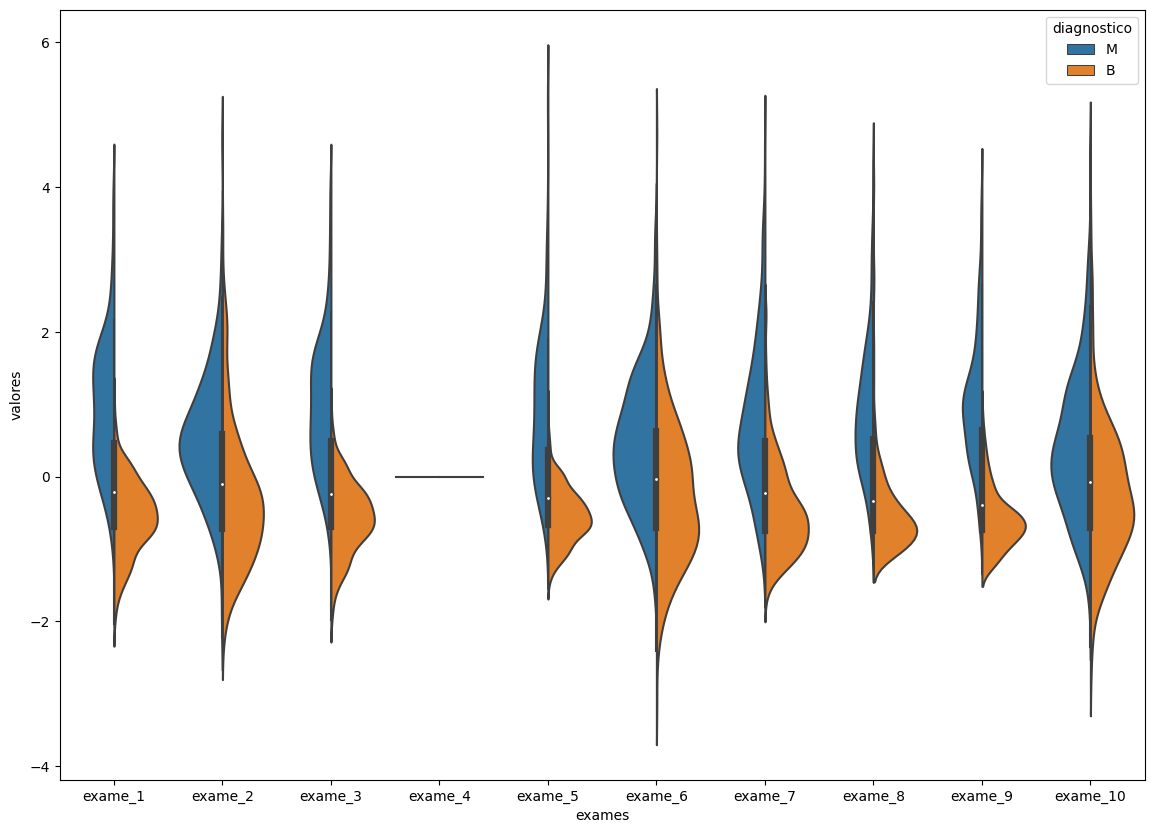

In [24]:
grafico_violino(valores_exames, 1,10)

<Axes: xlabel='exames', ylabel='valores'>

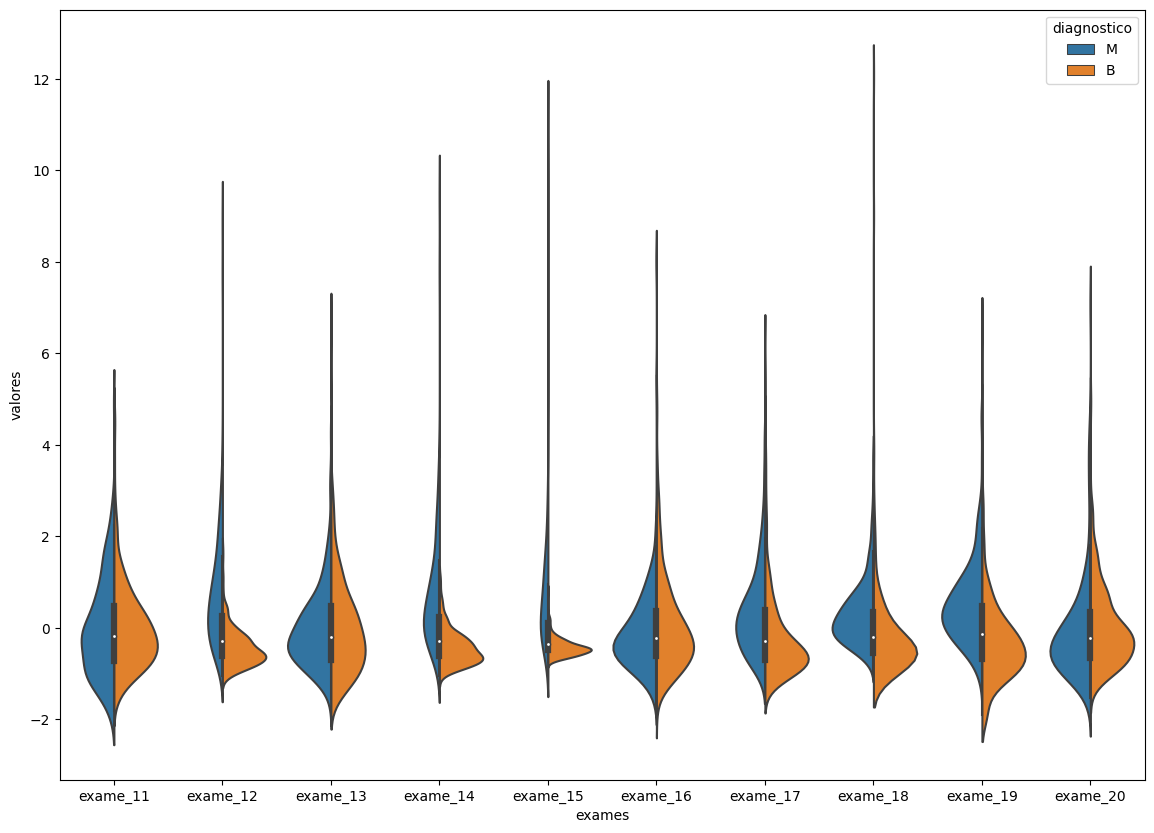

In [25]:
grafico_violino(valores_exames, 11,20)

<Axes: xlabel='exames', ylabel='valores'>

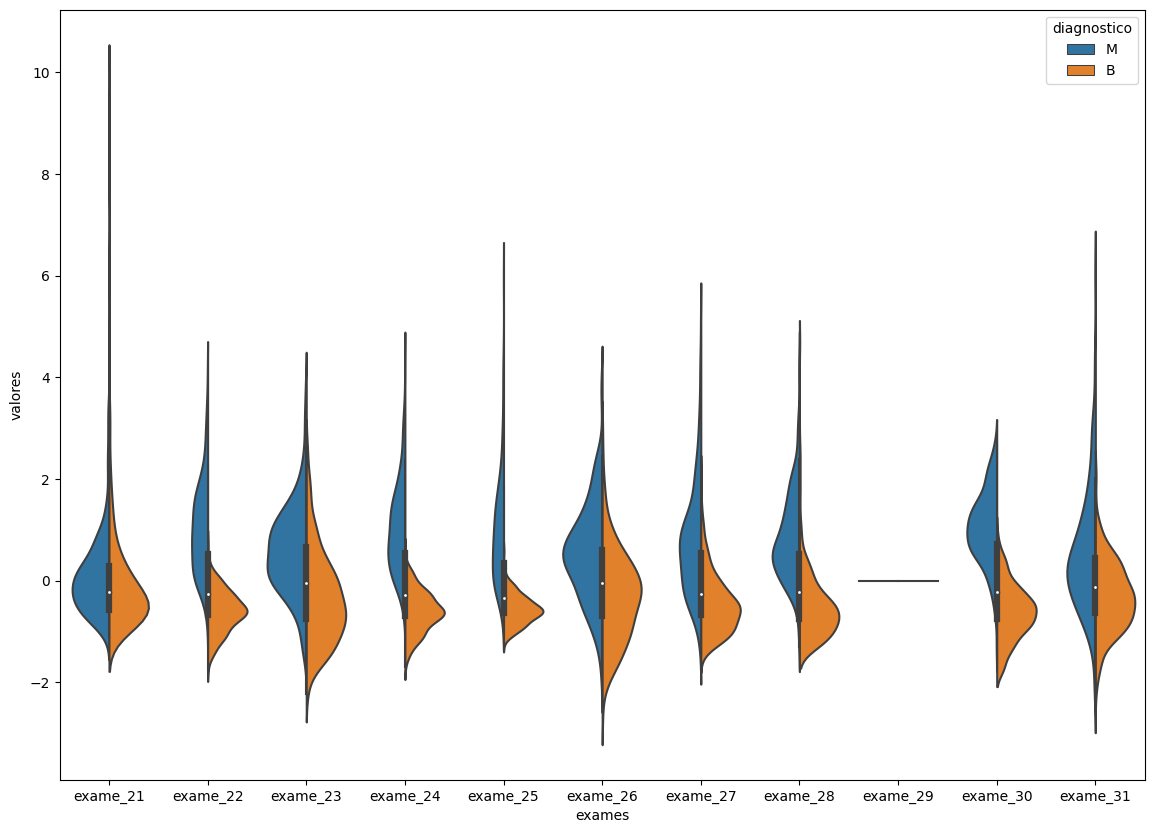

In [26]:
grafico_violino(valores_exames, 21,31)

In [27]:
valores_exames_v3 = valores_exames.drop(columns=['exame_4', 'exame_29'])
valores_exames_v3 = pd.concat([dados['diagnostico'], valores_exames_v3], axis=1)

In [28]:
valores_exames_v3.head()

,diagnostico,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
def classificar_rfc(valores):
    SEED = 1234
    np.random.seed(SEED)

    x = valores.drop(columns='diagnostico')
    y = valores['diagnostico']

    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                       test_size = 0.3)

    model = RandomForestClassifier(n_estimators = 100)
    model.fit(treino_x, treino_y)
    print(str(round(model.score(teste_x, teste_y)*100, 2))+'%')

In [30]:
classificar_rfc(valores_exames_v3)

92.98%


## Aula 3 - Dados Correlacionados

In [31]:
matriz_corr = valores_exames_v3.drop(columns='diagnostico').corr()

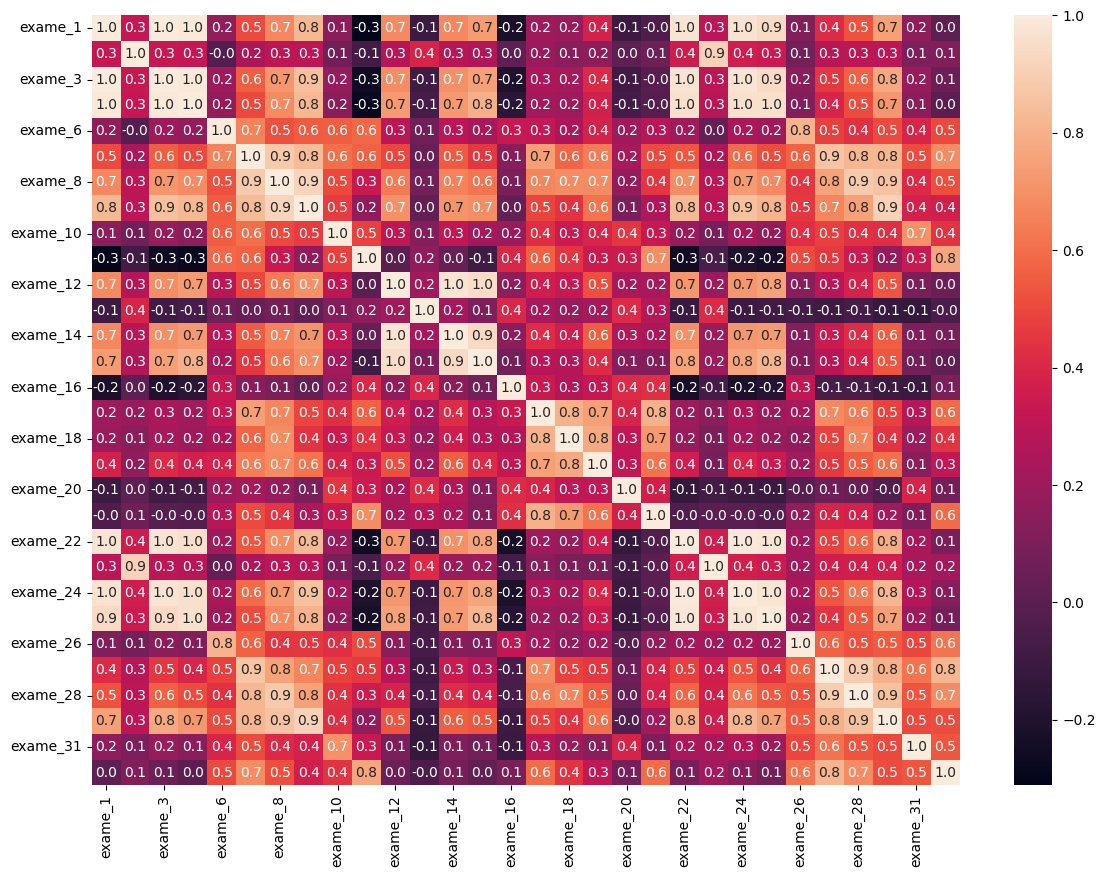

In [32]:
ax = sns.heatmap(matriz_corr, annot=True, fmt='.1f')
ax.figure.set_size_inches(14,10)

In [33]:
matriz_corr[matriz_corr[matriz_corr>0.99].sum() > 1]

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_22,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,0.185728,-0.253691,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
exame_24,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,0.219169,-0.205151,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957


In [34]:
matriz_corr_v1= matriz_corr.drop(columns=['exame_1', 'exame_3','exame_22', 'exame_24'])

In [35]:
matriz_corr_v1

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,0.323782,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,...,-0.104321,-0.042641,0.297008,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,1.000000,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,...,0.009127,0.054458,0.912045,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.329533,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,...,-0.081629,-0.005523,0.303038,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.321086,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,...,-0.072497,-0.019887,0.287489,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,-0.023389,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,...,0.200774,0.283607,0.036072,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.236702,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,...,0.229977,0.507318,0.248133,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.302418,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,...,0.178009,0.449301,0.299879,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.293464,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,...,0.095351,0.257584,0.292752,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.071401,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,...,0.449137,0.331786,0.090651,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.076437,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,...,0.345007,0.688132,-0.051269,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [36]:
valores_exames_v4 = valores_exames_v3.drop(columns=['exame_3','exame_24'])

In [37]:
valores_exames_v4.head()

,diagnostico,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,M,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
classificar_rfc(valores_exames_v4)

92.98%


## Aula 4 - Automatizando a seleção

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)

SEED = 1234
np.random.seed(SEED)

x = valores_exames_v4.drop(columns=['diagnostico'])
y = valores_exames_v4['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.3)
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print(str(round(classificador.score(teste_kbest, teste_y)*100, 2))+'%')

92.4%


In [40]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [41]:
matriz

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 23.52222222222222, 'Predição'),
 Text(50.722222222222214, 0.5, 'Real')]

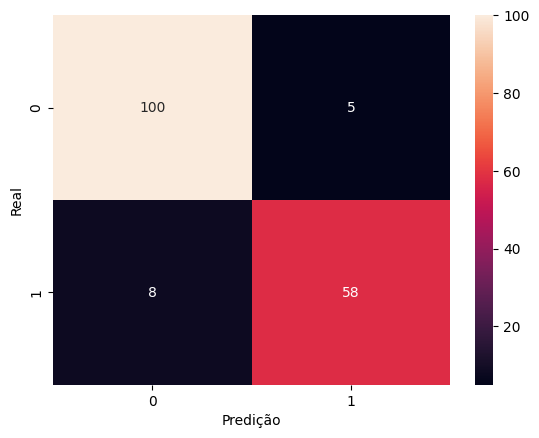

In [42]:
ax = sns.heatmap(matriz, annot=True, fmt='d')
ax.set(xlabel='Predição', ylabel='Real')

90.06%


[Text(0.5, 23.52222222222222, 'Predição'),
 Text(50.722222222222214, 0.5, 'Real')]

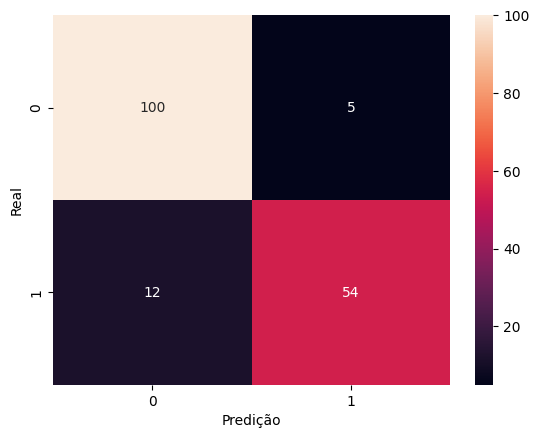

In [43]:
from sklearn.feature_selection import RFE

SEED = 1234
np.random.seed(SEED)

x = valores_exames_v4.drop(columns=['diagnostico'])
y = valores_exames_v4['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
print(str(round(classificador.score(teste_rfe, teste_y)*100, 2))+'%')

matriz = confusion_matrix(teste_y, classificador.predict(teste_rfe))
ax = sns.heatmap(matriz, annot=True, fmt='d')
ax.set(xlabel='Predição', ylabel='Real')

## Aula 5 - Visualizando os dados no plano

92.98%


[Text(0.5, 23.52222222222222, 'Predição'),
 Text(50.722222222222214, 0.5, 'Real')]

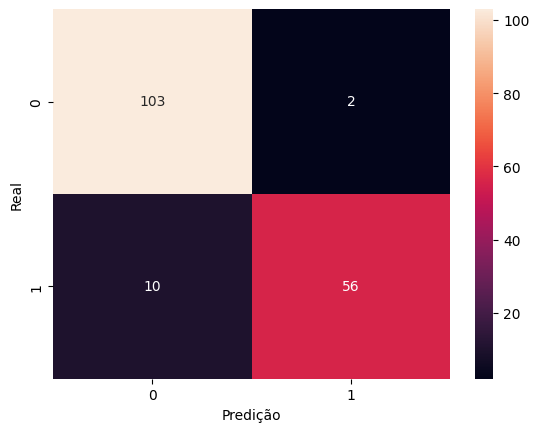

In [44]:
from sklearn.feature_selection import RFECV

SEED = 1234
np.random.seed(SEED)

x = valores_exames_v4.drop(columns=['diagnostico'])
y = valores_exames_v4['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring='accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)
print(str(round(classificador.score(teste_rfecv, teste_y)*100, 2))+'%')

matriz = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
ax = sns.heatmap(matriz, annot=True, fmt='d')
ax.set(xlabel='Predição', ylabel='Real')

In [45]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

<Axes: >

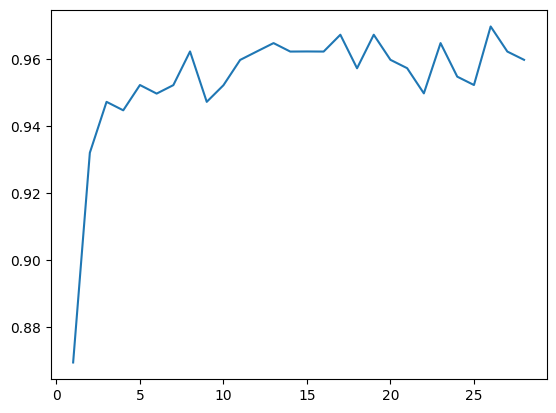

In [46]:
sns.lineplot(x=range(1, len(selecionador_rfecv.cv_results_['mean_test_score'])+1), 
             y=selecionador_rfecv.cv_results_['mean_test_score'])


87.13%


[Text(0.5, 23.52222222222222, 'Predição'),
 Text(50.722222222222214, 0.5, 'Real')]

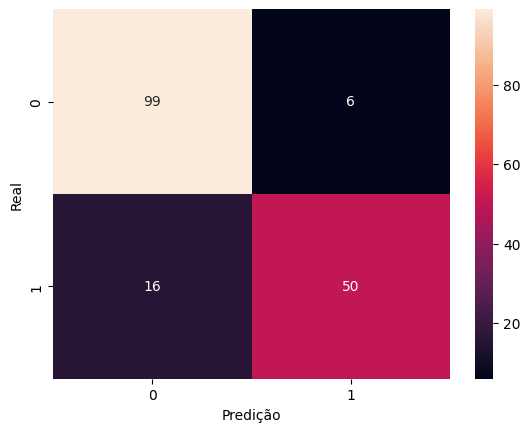

In [47]:
from sklearn.feature_selection import RFE

SEED = 1234
np.random.seed(SEED)

x = valores_exames_v4.drop(columns=['diagnostico'])
y = valores_exames_v4['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
print(str(round(classificador.score(teste_rfe, teste_y)*100, 2))+'%')

matriz = confusion_matrix(teste_y, classificador.predict(teste_rfe))
ax = sns.heatmap(matriz, annot=True, fmt='d')
ax.set(xlabel='Predição', ylabel='Real')

In [48]:
valores_exames_v5 = selecionador_rfe.transform(valores_exames_v4.drop(columns='diagnostico'))

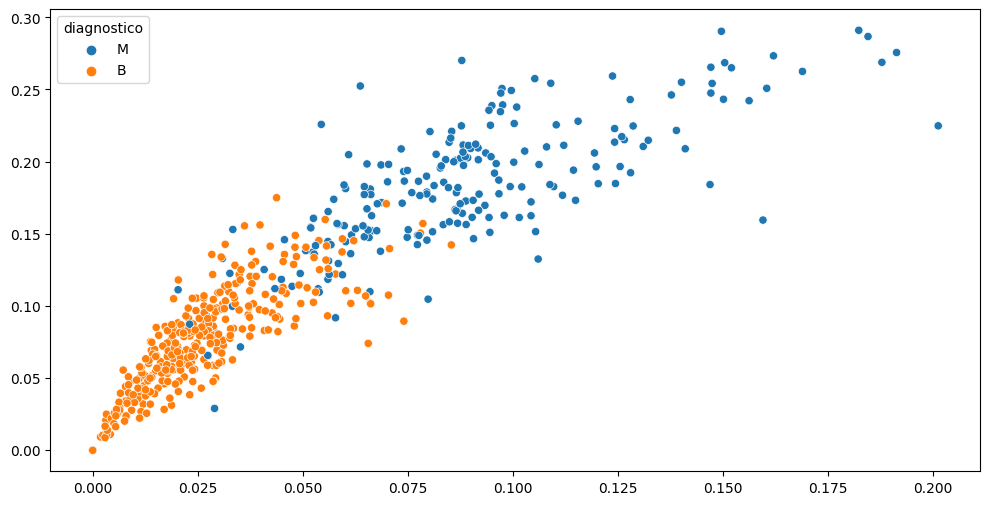

In [49]:
ax = sns.scatterplot(x=valores_exames_v5[:,0], y=valores_exames_v5[:,1], hue=valores_exames_v4['diagnostico'])
ax.figure.set_size_inches(12,6)

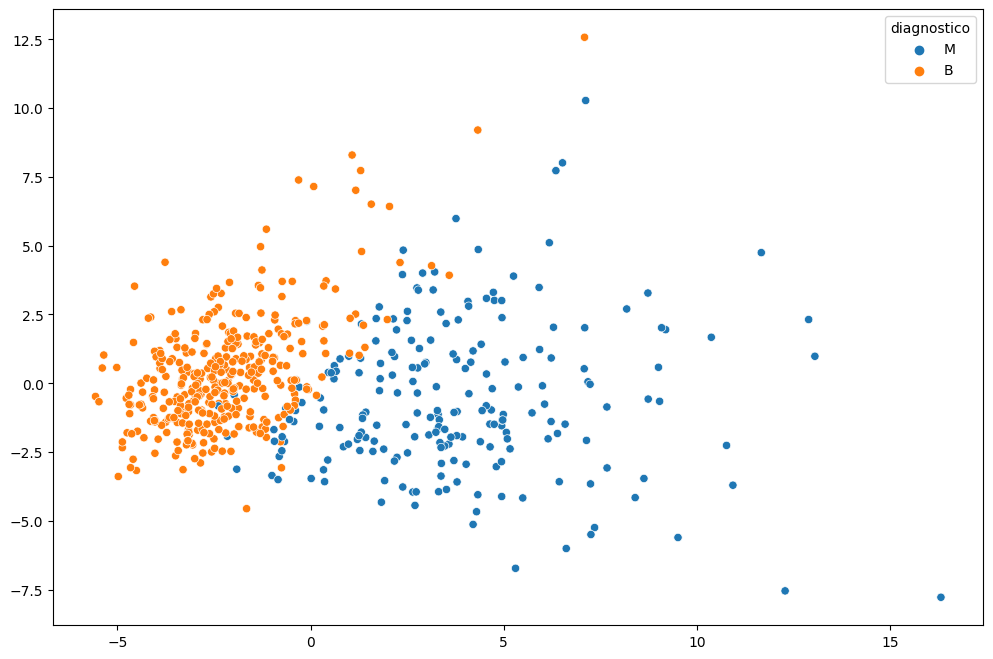

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_exames_v6 = pca.fit_transform(valores_exames_v2.drop(columns='diagnostico'))
ax = sns.scatterplot(x=valores_exames_v6[:,0], y=valores_exames_v6[:,1], hue=valores_exames_v4['diagnostico'])
ax.figure.set_size_inches(12,8)

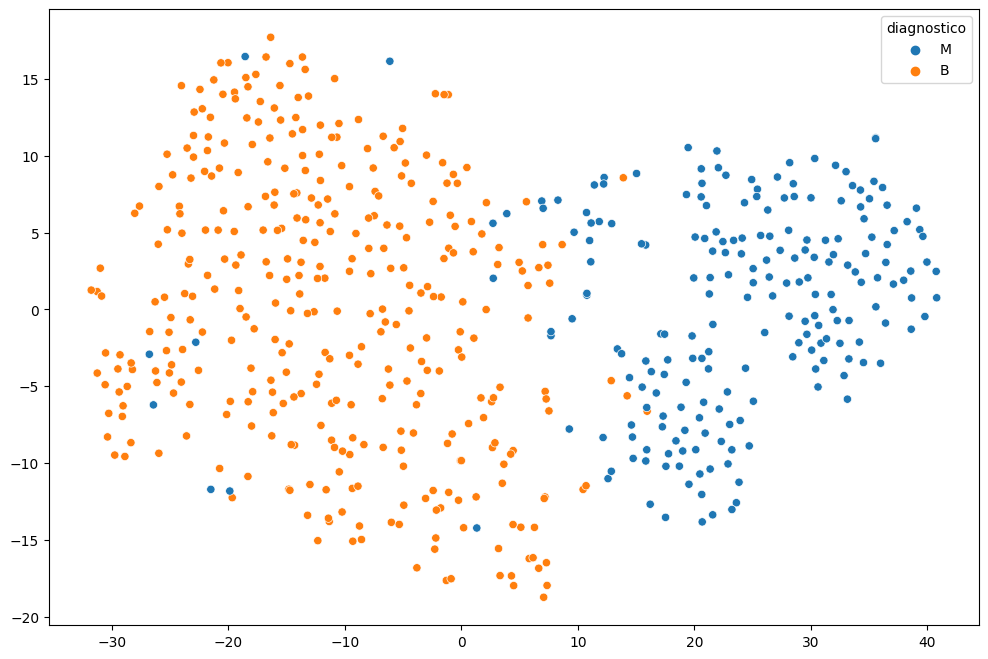

In [51]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_exames_v7 = tsne.fit_transform(valores_exames_v2.drop(columns='diagnostico'))
ax = sns.scatterplot(x=valores_exames_v7[:,0], y=valores_exames_v7[:,1], hue=valores_exames_v4['diagnostico'])
ax.figure.set_size_inches(12,8)